In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

from dcgan.nn import Generator, Discriminator
from dcgan.utils import init_weights, show_batch
from dcgan.dataset import FacesDataset

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [17]:
batch_size = 128
image_size = 128
n_channels = 3
z_size = 100
n_features_gen = 128
n_features_dis = 128
n_layers_gen = 5
n_layers_dis = 5
n_epochs = 100
lr = 2e-4
betas = (0.5, 0.999)

folder = '/Users/cheremushkin/Documents/datasets/simpsons/'

In [6]:
g = Generator(z_size=z_size,
              n_features=n_features_gen,
              n_layers=n_layers_gen,
              n_channels=n_channels)
g.apply(init_weights).to(device)

Generator(
  (blocks): ModuleList(
    (0): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(100, 3200, kernel_size=(4, 4), stride=(1, 1), bias=False)
        (1): BatchNorm2d(3200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(3200, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (2): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (3): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspos

In [7]:
d = Discriminator(n_channels=n_channels,
                  n_features=n_features_dis,
                  n_layers=n_layers_dis)
d.apply(init_weights).to(device)

Discriminator(
  (blocks): ModuleList(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (1): ConvBlock(
      (block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (2): ConvBlock(
      (block): Sequential(
        (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (3): ConvBlock(
      (block): Sequential(
 

In [26]:
transforms = A.Compose([
    A.Resize(image_size, image_size),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2(p=1)
])

ds = FacesDataset(folder=folder, transforms=transforms)
dl = DataLoader(dataset=ds, batch_size=2, shuffle=True, num_workers=2)

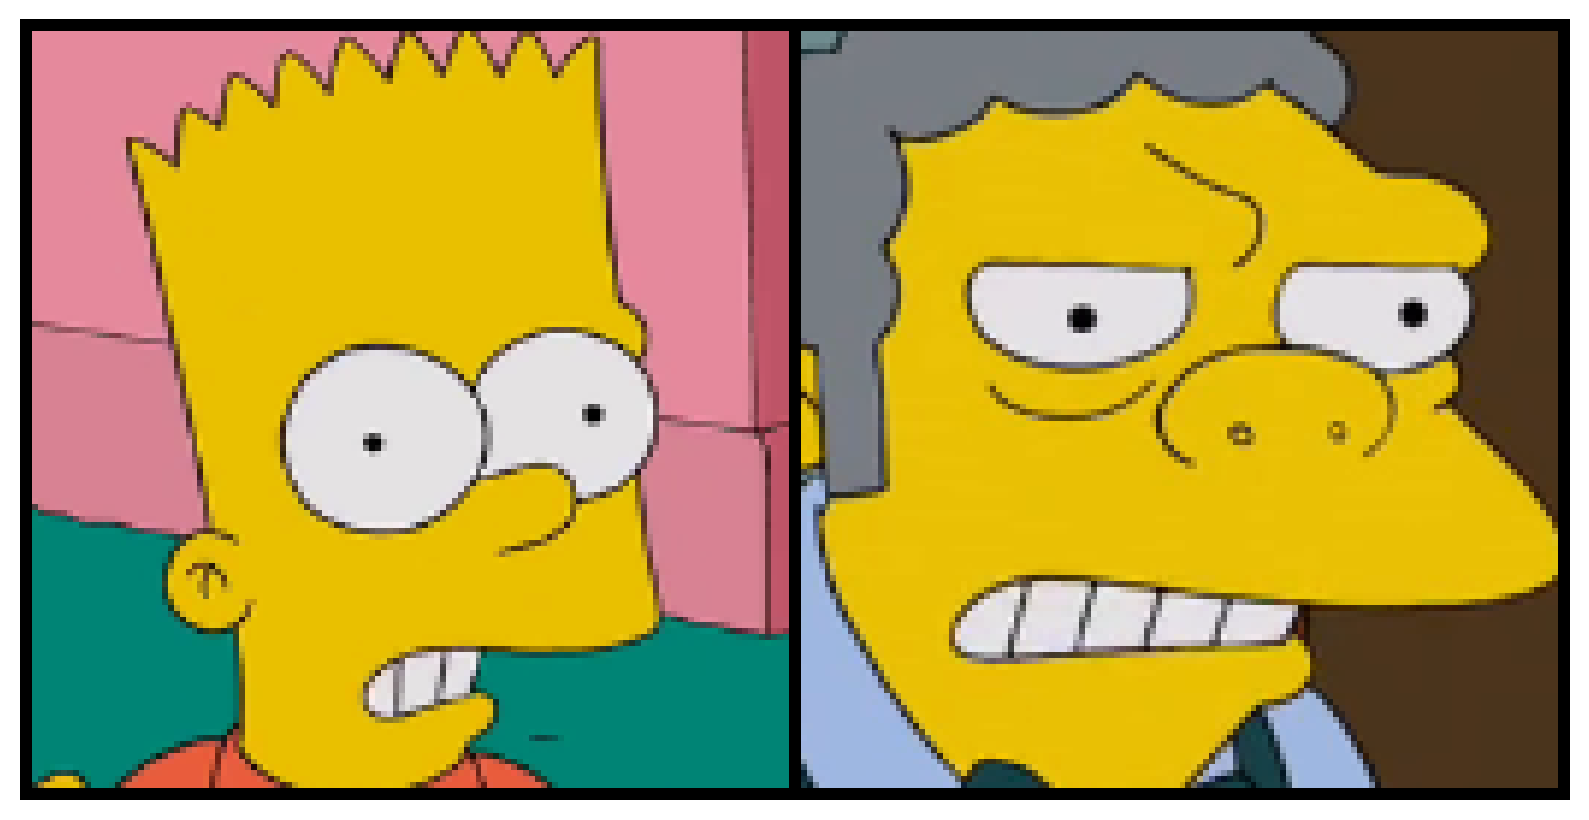

In [29]:
show_batch(next(iter(dl)))